<div style="text-align:center; font-size:36px; font-weight:bold; color:#2874A6; text-shadow: 1px 1px 2px #000;">
    Car Price Prediction Project
</div>

## **PHASE 5 PROJECT: GROUP 5**

### **Team Members:**
- **Kelvin Mwaura**  
- **Marion Achieng**  
- **Gerald Mwangi**  
- **Jackson Munene**
- **Benedict Kuloba**

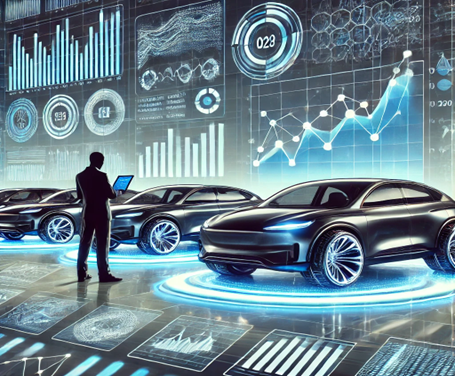

*Figure 1: A visual depiction of predictive analytics integrated with modern automotive sales.*

## Business Understanding
---

#### Overview 

The used car market in Kenya has undergone significant changes since the country's independence. In the early post-independence years of the 1960s through the 1980s, Kenya's automotive landscape was dominated by new vehices however, in the 1990s  the marked had a turning point as economic liberalization policies relaxed car importation restrictions, opening the door to an increasing number of used car imports, primarily from Japan. This trend accelerated into the 2000s, with used cars becoming increasingly popular due to their affordability compared to new vehicles. Due to these relaxed policies used cars have become quite popular and affordable making up the majority of vehicle sales in Kenya, with about 80% of all vehicles sold being pre-owned these is due to increase in their demand among may car buyers due to there affordability The market used  is made up of  foreign or locally used vehicle

Navigating this market can be challenging, as both buyers and sellers often face the difficulty of determining fair prices due to various influencing factors such as age, mileage, and condition of the vehicles. Accurate price estimation is crucial for making informed decisions in this dynamic market.These project aims to offer car buyers and sellers an efficient,reliable and accurate solution in pricing of different vehicle models based on their various features by leveraging data driven insights analysis and machine learning tools and techinques
  
This project focuses on creating a machine learning model tailored specifically to the **Kenyan market**, aiming to predict the value of used cars based on various features.

---

#### Problem Statement

The Kenyan used car market lacks a reliable, data-driven mechanism for accurately predicting vehicle prices. This absence leads to inefficiencies and uncertainties for buyers, sellers, and other stakeholders in the automotive sector. Currently, pricing is often based on subjective assessments or incomplete information, resulting in potential overpricing or undervaluing of vehicles hence these situation often leads to prolonged negotiation processes, unfair deals, and a lack of trust in the market.

**Accurate price prediction** is **crucial** for ensuring that both buyers and sellers make **informed decisions** in this dynamic market. Misjudging the value of a vehicle can result in **significant financial losses** or **missed opportunities** for both parties. Additionally, having a clear understanding of **vehicle pricing trends** enables businesses in the automotive sector to make **data-driven stocking** and **pricing decisions**, aligning inventory with **market demands** and **customer preferences**.

By leveraging a **machine learning model** specifically tailored to the Kenyan market, stakeholders can achieve a **more transparent** and **efficient marketplace**. This approach will ultimately **boost confidence** and **satisfaction** in vehicle transactions, fostering a healthier and more reliable automotive market.

---

#### Objectives

**Main Objective**

1. To develop a machine learning model that predicts prices of used cars accurately in kenya based on the vehicle various  features

**Specific Objectives**

2. To determine which vehicle features that have the greatest impact on the price of the vehicle 

3. To  determine which car brands is populars in the kenya used car market

4. To determine vehicle features are the most common in our dataset 

---




## Data Understanding

The data for this project was sourced from various **Kenyan online marketplaces** and **classified listings**. This dataset contains car listings from **2021**, capturing key information such as the car’s **make**, **model**, **year of manufacture**, **mileage**, **fuel type**, **transmission**, and the listed price. This data forms the foundation for building the predictive model and offers valuable insights into the Kenyan used car market.


With a substantial size of 6,019 entries, this dataset offers valuable insights for our analysis. It encompasses a range of features pertinent to the Kenyan automotive market. Below is a description of the dataset's columns:

- **Total Rows:** 6,019
- **Total Columns:** 11

#### Column Details:

| **Column Name**       | **Description**                                              | **Data Type**    |
|------------------------|--------------------------------------------------------------|------------------|
| **No**                 | Unique identifier for each vehicle listing.                | Integer (int64)  |
| **Name**               | Model name of the vehicle.                                 | String (object)  |
| **Year**               | Year the vehicle was manufactured.                          | Integer (int64)  |
| **Kilometers_Driven**  | Total distance covered by the vehicle in kilometers.        | Integer (int64)  |
| **Fuel_Type**          | Type of fuel used by the vehicle (e.g., petrol, diesel).    | String (object)  |
| **Transmission**       | Transmission type of the vehicle (e.g., manual, automatic). | String (object)  |
| **Use**                | where the ehicle was previously used (e.g foreign,local)   | String (object)  |
| **Engine**             | Engine capacity or specification of the vehicle.           | String (object)  |
| **Power**              | Power output of the vehicle’s engine, typically in brakehorsepower. | String (object)  |
| **Seats**              | Number of seats available in the vehicle.                  | Integer (int64)  |
| **Car_price**          | Price of the vehicle listed in Kenyan Shillings.            | Float (float64)  |

---

Lets load our dataset and explore  it more

In [1]:
# Importing necessary libraries

# Data manupulation
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Multicolinearity test
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelling
from sklearn.linear_model import LinearRegression, Ridge ,Lasso,ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


# Saving the model
import pickle

import warnings


## Loading Data

In [2]:
# Loading our data

df = pd.read_excel('car_data.xlsx')

# viewing the dataframe
df

           

,No,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
0,0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,foreign,998 CC,58.16 bhp,5.0,292250.0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,foreign,1582 CC,126.2 bhp,5.0,2087500.0
2,2,Honda Jazz V,2011,46000,Petrol,Manual,foreign,1199 CC,88.7 bhp,5.0,751500.0
3,3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,foreign,1248 CC,88.76 bhp,7.0,1002000.0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,local,1968 CC,140.8 bhp,5.0,2962580.0
...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,2014,27365,Diesel,Manual,foreign,1248 CC,74 bhp,5.0,793250.0
6015,6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,foreign,1120 CC,71 bhp,5.0,668000.0
6016,6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,local,2498 CC,112 bhp,8.0,484300.0
6017,6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,foreign,998 CC,67.1 bhp,5.0,442550.0


Next, we will get a summary of our dataset.

In [3]:
# function to gies ud a summary of our data
def data_summary(df):
    print(f'Data info:\n{df.info()}')
    print(f'Data shape:\n{df.shape}')
    print(f'Data summary statistics:\n{df.describe().transpose()}')
    return 

# applying our function
data_summary(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Use                6019 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Car_price          6019 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 517.4+ KB
Data info:
None
Data shape:
(6019, 11)
Data summary statistics:
                    count          mean           std      min       25%  \
No                 6019.0  3.009000e+03  1.737680e+03      0.0   

The dataset contains 6,019 rows with 11 columns that specify various features of used automobiles, including the vehicle's identification number 'No', name, year of manufacture, kilometres driven(mileage), fuel type, transmission, use type, engine specs, power output, number of seats, and price. The bulk of the columns have non-null values, however several, such as 'Engine', 'Power', and 'Seats', have a few blank entries. The models range from 1998 to 2019, with an average year of 2013. The mileage varies greatly, with a median of 53,000 km driven. Car prices range from ksh 73,480 to ksh 2.67 million, with an average of around ksh 1.58 million. 

## Data Preparation

### 1: Data Cleaning

At these stage we will clean our data using the following steps

**. Uniformity** - we will check for uniformity in column naming, column data types

**. Completeness** - we will check for missing values , how they affect our data set and how  to handle them

**. Consistency** - we will check for duplicate values and  how to handle them

**. Validity** - we will  check for outliers  and how to handle them

#### Uniformity

First , we strip the 'cc' in engine and 'bhp' in power ,then change their data types from object to floats and seats from float to integer to reflects the real-world scenario accurately by first filling its 42 null values with the mode because most the car seats range between 4 to 7 seats hence  representing the real world phenomena

Lets  also change the columns naming of name to model,kilometers driven to mileage  for easy understandbility and also standardize the text in the columns with strings for uniformity 

In [4]:
# function for changing data types
def uniformity(df):
    # # Remove non-numeric characters and convert to float for 'Engine' and 'Power'
    df['Engine'] = df['Engine'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
    df['Power'] = df['Power'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
    
    # Fill missing values in 'Seats' with the median value before converting to int
    df['Seats'] = df['Seats'].fillna(df['Seats'].median()).astype(int)
    
    # Standardize text data
    df['Name'] = df['Name'].astype(str).str.lower()
    df['Fuel_Type'] = df['Fuel_Type'].astype(str).str.lower()
    df['Transmission'] = df['Transmission'].astype(str).str.lower()
    df['Use'] = df['Use'].astype(str).str.lower().str.strip()
    df['Use'] = df['Use'].replace({'third': 'local', 'fourth & above': 'local'})
    
    # Renaming columns names
    df['Name'] = df['Name'].str.replace('maruti', 'suzuki')
    df.rename(columns={'Name': 'Model','Kilometers_Driven': 'Mileage'}, inplace=True)
    
    # Confirm the changes
    df.info()
    
    return df



# applying the function
uniformity(df)

            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            6019 non-null   int64  
 1   Model         6019 non-null   object 
 2   Year          6019 non-null   int64  
 3   Mileage       6019 non-null   int64  
 4   Fuel_Type     6019 non-null   object 
 5   Transmission  6019 non-null   object 
 6   Use           6019 non-null   object 
 7   Engine        5983 non-null   float64
 8   Power         5876 non-null   float64
 9   Seats         6019 non-null   int32  
 10  Car_price     6019 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 493.9+ KB


,No,Model,Year,Mileage,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
0,0,suzuki wagon r lxi cng,2010,72000,cng,manual,foreign,998.0,58.16,5,292250.0
1,1,hyundai creta 1.6 crdi sx option,2015,41000,diesel,manual,foreign,1582.0,126.20,5,2087500.0
2,2,honda jazz v,2011,46000,petrol,manual,foreign,1199.0,88.70,5,751500.0
3,3,suzuki ertiga vdi,2012,87000,diesel,manual,foreign,1248.0,88.76,7,1002000.0
4,4,audi a4 new 2.0 tdi multitronic,2013,40670,diesel,automatic,local,1968.0,140.80,5,2962580.0
...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,suzuki swift vdi,2014,27365,diesel,manual,foreign,1248.0,74.00,5,793250.0
6015,6015,hyundai xcent 1.1 crdi s,2015,100000,diesel,manual,foreign,1120.0,71.00,5,668000.0
6016,6016,mahindra xylo d4 bsiv,2012,55000,diesel,manual,local,2498.0,112.00,8,484300.0
6017,6017,suzuki wagon r vxi,2013,46000,petrol,manual,foreign,998.0,67.10,5,442550.0


#### Completeness

In [5]:
# function for checking for missing values
def missing_values(df):
    total = len(df)
    null = df.isnull().sum()
    percentage = (null /total)*100
    print(f'Null values per column:\n{null}')
    print(f'Percentage of null values per column:\n{percentage}')
    return

missing_values(df)



Null values per column:
No                0
Model             0
Year              0
Mileage           0
Fuel_Type         0
Transmission      0
Use               0
Engine           36
Power           143
Seats             0
Car_price         0
dtype: int64
Percentage of null values per column:
No              0.000000
Model           0.000000
Year            0.000000
Mileage         0.000000
Fuel_Type       0.000000
Transmission    0.000000
Use             0.000000
Engine          0.598106
Power           2.375810
Seats           0.000000
Car_price       0.000000
dtype: float64


The column engine and power have missing values. To assess the extent of the missing data, we calculate the percentage of null values and found engine at 0.6% and power at 2.38%which were not significantly large and could not afford to lose any datadue to our limited dataset we filled the null values with median to represents the middle value of the dataset and  it is less affected by outliers compared to the mean. This ensures that the imputation reflects a central, robust estimate of the typical value 

In [6]:
# Fill missing values in 'Engine', and'Power', with the median a
df['Engine'] = df['Engine'].fillna(df['Engine'].median())
df['Power'] = df['Power'].fillna(df['Power'].median())

# confirming their are no missing_values
df.isnull().sum()

No              0
Model           0
Year            0
Mileage         0
Fuel_Type       0
Transmission    0
Use             0
Engine          0
Power           0
Seats           0
Car_price       0
dtype: int64

#### Consistency

In [7]:
df.duplicated().sum()

0

No duplicates values

#### Validity

We will drop the 'No' column it does not have any relevance in our analysis

In [8]:
# dropping the  no column
df.drop(columns=['No'], inplace=True)


Lets examine our data for outliers using interquatrile method

In [9]:
#checking for outliers using intequatrile method for each numeric column
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

Year               5.00
Mileage        39000.00
Engine           771.00
Power             60.03
Seats              0.00
Car_price    1077150.00
dtype: float64


The dataset contains outliesrs such as  Mileage (39,000), and Power (60.03), among others. These statistics describe specific automotive attributes such as the year of manufacturing, mileage, engine capacity, power, number of seats, and price. While these outliers might occasionally mislead analysis, we are not removing them in this case because each value represents a genuine and realistic phenomena in the  real-world.

Our data is now cleaned and we can procede to the next step

### 2: Feature engineering

By creating new columns like age  and brand we are able to perform deeper analysis to gain more insights, the age of the vehicle was calculated by substracting the vehicle manufacture year by our current year 2024 to get the lastest age as per now

In [10]:
# Creating a new column age
df['age'] = 2024 - df['Year']

# creating brand column
df['Brand'] = df['Model'].apply(lambda x: x.split()[0])

df

,Model,Year,Mileage,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price,age,Brand
0,suzuki wagon r lxi cng,2010,72000,cng,manual,foreign,998.0,58.16,5,292250.0,14,suzuki
1,hyundai creta 1.6 crdi sx option,2015,41000,diesel,manual,foreign,1582.0,126.20,5,2087500.0,9,hyundai
2,honda jazz v,2011,46000,petrol,manual,foreign,1199.0,88.70,5,751500.0,13,honda
3,suzuki ertiga vdi,2012,87000,diesel,manual,foreign,1248.0,88.76,7,1002000.0,12,suzuki
4,audi a4 new 2.0 tdi multitronic,2013,40670,diesel,automatic,local,1968.0,140.80,5,2962580.0,11,audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,suzuki swift vdi,2014,27365,diesel,manual,foreign,1248.0,74.00,5,793250.0,10,suzuki
6015,hyundai xcent 1.1 crdi s,2015,100000,diesel,manual,foreign,1120.0,71.00,5,668000.0,9,hyundai
6016,mahindra xylo d4 bsiv,2012,55000,diesel,manual,local,2498.0,112.00,8,484300.0,12,mahindra
6017,suzuki wagon r vxi,2013,46000,petrol,manual,foreign,998.0,67.10,5,442550.0,11,suzuki


### 3: EDA

We will analysis our data in the following steps

**. Univarent anaysis** - analysing one variable

**. Bivarent anaysis** - comparing two variables

**. Multicolinearity analysis** - use VIF and correlation matrix

#### Univarent Analysis

In [11]:
#Function for plotting histograms
def plot_histograms(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Function to plot count plots
def plot_countplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()



**Distribution of year**

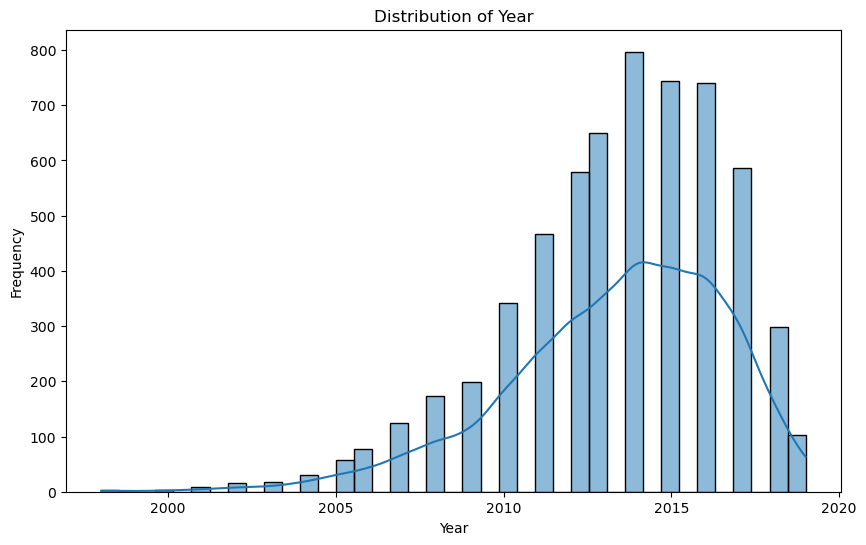

In [12]:
plot_histograms(df, 'Year')

**Observations**

Left skwedness implying the distribution of most vehicles were manufactured around 2010, indicating a higher prevalence of cars that are about 10 years old in the listings.

This trend suggests that cars from this period are more commonly available in the second-hand market, which can influence pricing strategies.

**Distribution of mileage**

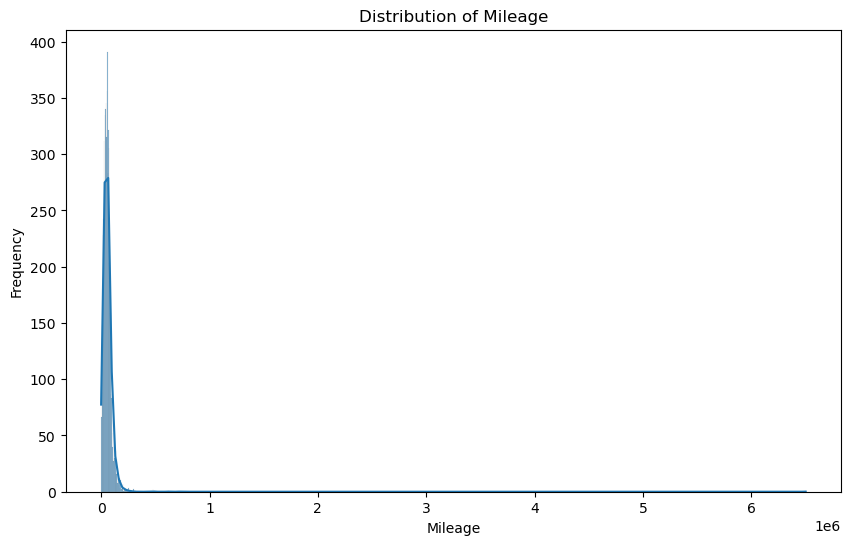

In [13]:
plot_histograms(df, 'Mileage')

**Observations**

Right skwedness mean that majority of vehicles have lower kilometers driven, with a sharp decline in frequency as the kilometers increase.

Vehicles with fewer kilometers are more prevalent and likely more desirable due to less wear and tear, affecting their market value.

**Distribution of engine size**

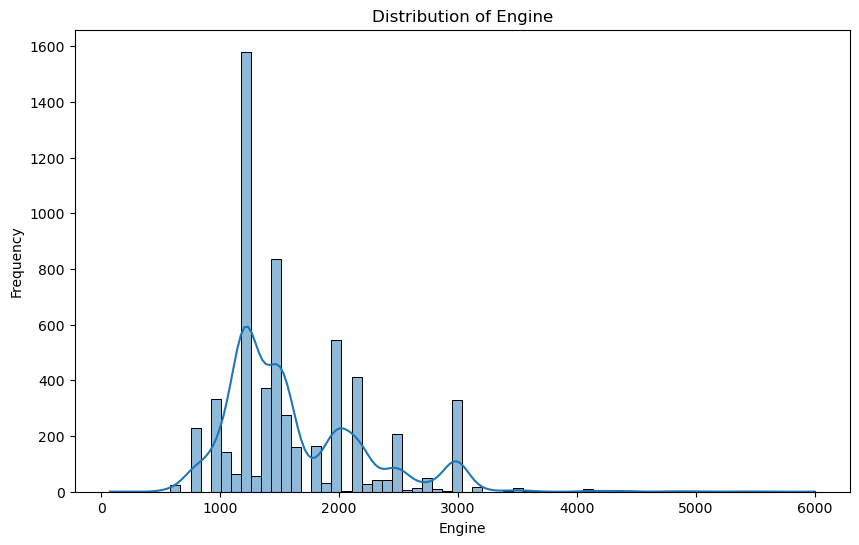

In [14]:
plot_histograms(df, 'Engine')

**Observations**

Right-skewed suggests that smaller engine sizes are more common in the dataset.
The long tail to the right indicates that there are relatively few instances with very large engine sizes compared to smaller ones.

 Mid-sized engines are the most common, suggesting a balance of performance and fuel efficiency that appeals to buyers.

**Distribution of Seats**

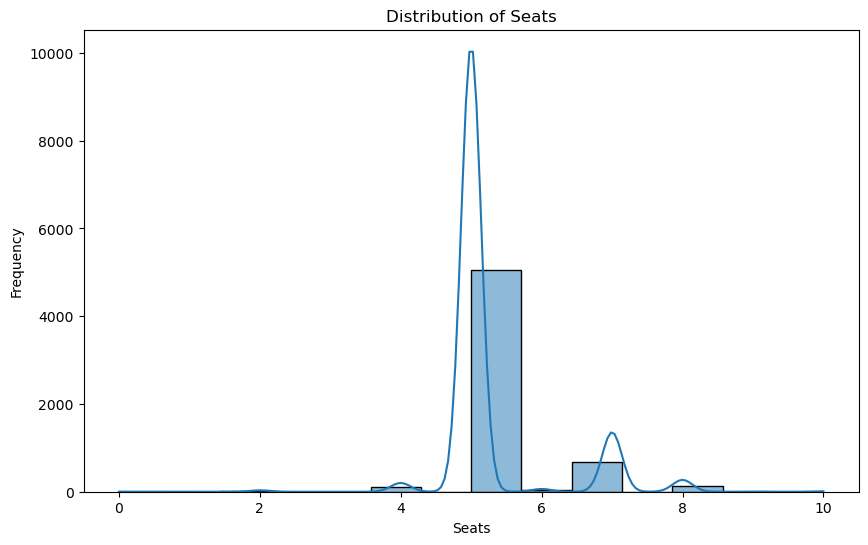

In [15]:
plot_histograms(df, 'Seats')

**Observations**

The most common number of seats is at 4 seats, indicating that most vehicles are designed to accommodate four passengers.

This reflects market preferences for family oriented cars, which can guide inventory and pricing decisions.

**Distribution of Age**


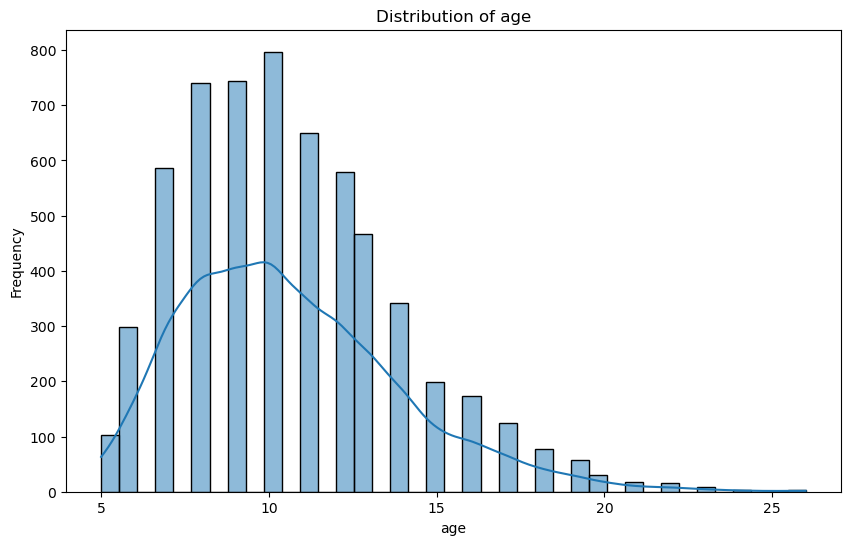

In [16]:
plot_histograms(df, 'age')

**Observations**

Right skweded shows newer vehicles 5yrs old, with a decline as the age increases.

Newer vehicles are likely command higher prices due to better their condition and lower mileage.

**Distribution of Car price**



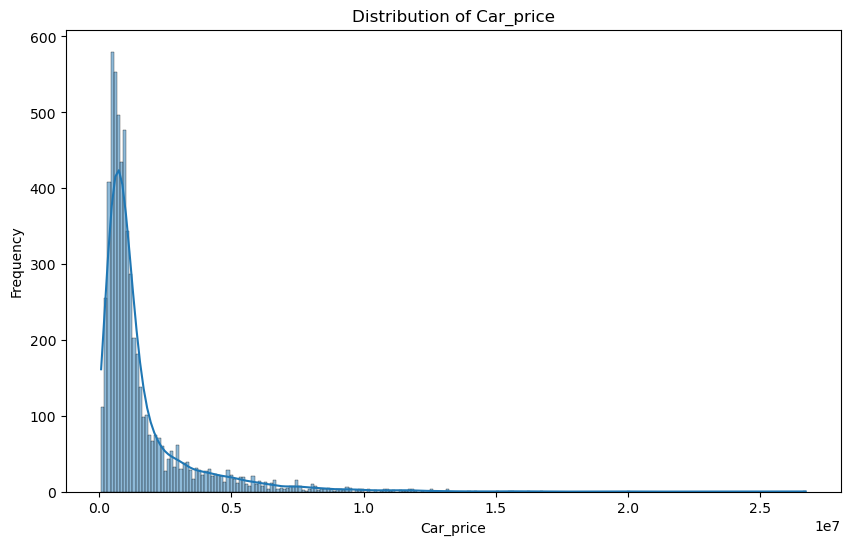

In [17]:
plot_histograms(df, 'Car_price')

**Observations**

Right skweded showing that most used cars fall into the lower price range

Higher priced used cars are less common, possibly due to affordability constraints.



**Distribution of  transmission**

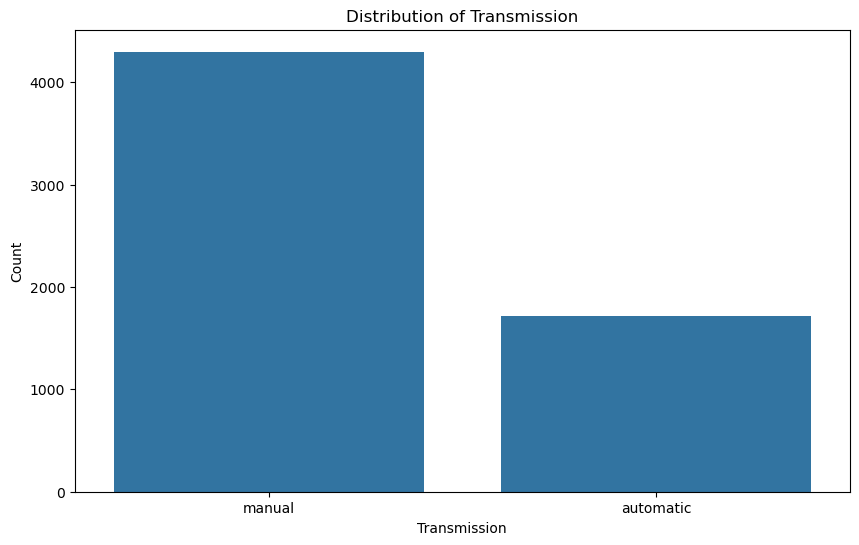

In [18]:
plot_countplot(df, 'Transmission')

**Observations**

The manual category has a significantly higher count (taller bar) compared to the automatic category

The preference for manual transmissions may vary based on factors like driving habits, fuel efficiency, and personal preferences

**Distribution of Fuel type**

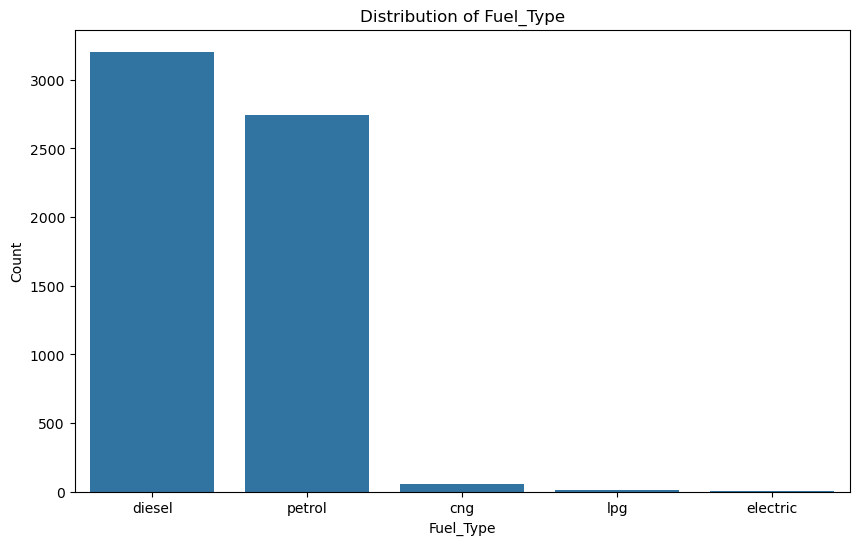

In [19]:
plot_countplot(df, 'Fuel_Type')

**Observations**

Diesel and petrol are the dominant fuel types in this dataset

This distribution reflects the current market affordability or availability of different fuel options.


**Distribution of 5 Top brands**

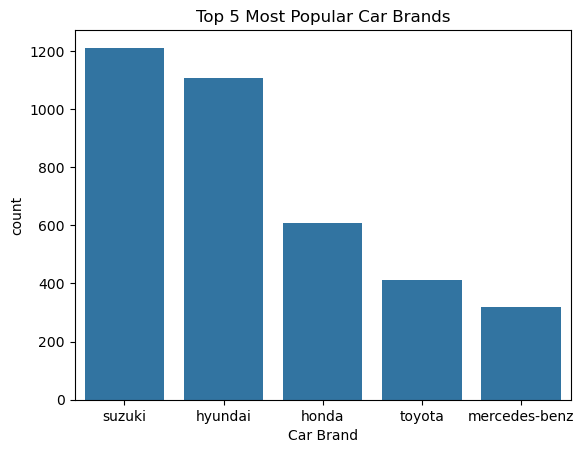

In [20]:
# Visualizing the top 5 popular brands of the vehicles
sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().nlargest(5).index)
plt.title('Top 5 Most Popular Car Brands')
plt.xlabel('Car Brand')
plt.show()


**Observations**

Suzuki and Hyundai are the most popular brands, followed by Honda, Toyota, and Mercedes-Benz although more data is need to conclude these

Understanding brand popularity helps in targeting marketing efforts and managing inventory to meet consumer demand.

#### Bivarent analysis

In [21]:
# Creating a function 
def bivarent_analysis(df, x_column, y_column, color='red', x_label=None, y_label=None):
    if df is not None:
        plt.figure(figsize=(10, 6))
        plt.scatter(df[x_column], df[y_column], color=color)
        # Calculate correlation
        correlation = df[[x_column, y_column]].corr().iloc[0, 1]
        # Fit the line to the data
        x = df[x_column]
        y = df[y_column]
        coefficients = np.polyfit(x, y, 1)  
        poly = np.poly1d(coefficients)
        x_fit = np.linspace(x.min(), x.max(), 100)
        y_fit = poly(x_fit)
        plt.plot(x_fit, y_fit, color='blue', linestyle='--', linewidth=2, label='Fit Line')
        
        title = (f'Relationship Between {x_column} and {y_column} '
                 f'(Correlation: {correlation:.2f})')
        plt.title(title)
        plt.xlabel(x_label if x_label else x_column)
        plt.ylabel(y_label if y_label else y_column)
        plt.legend()
        
        plt.grid(True)
        plt.show()
    else:
        print("No data available for plotting.")


**Scatter plot of power and car_price**

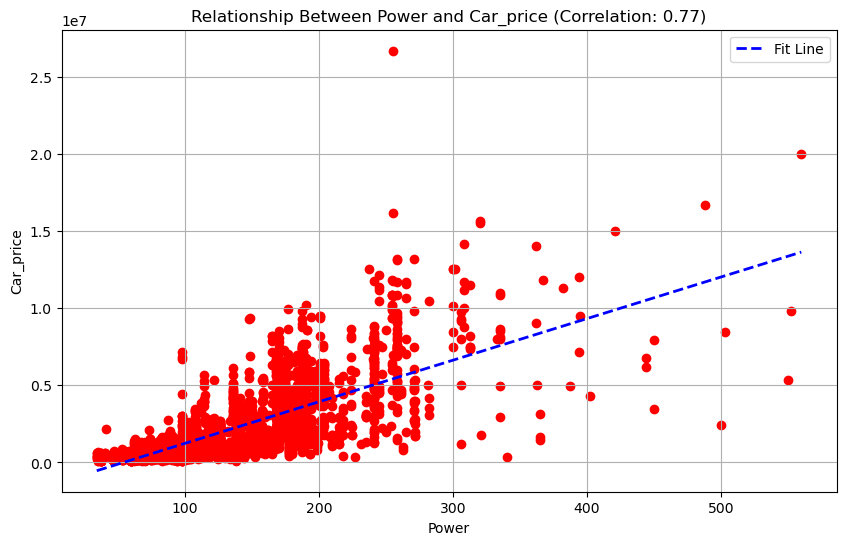

In [22]:
bivarent_analysis(df, x_column='Power', y_column='Car_price')

**Observations**

This indicates a strong positive correlation between car power and price; as the power increases, so does the price

Cars with more power sell for much higher prices

**Scatter plot of age and car price**


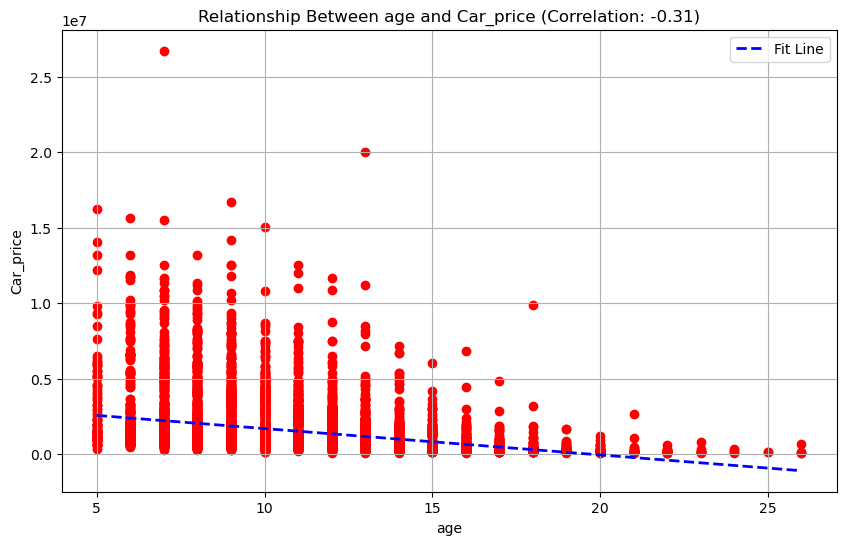

In [23]:
bivarent_analysis(df, x_column='age', y_column='Car_price')

**Observations**

A weak negative correlation between the two variables, the more the car ages the lower the price indicating cars more than 10 years old depreciate more in terms of the value

**Scatter plot mileage and car price**



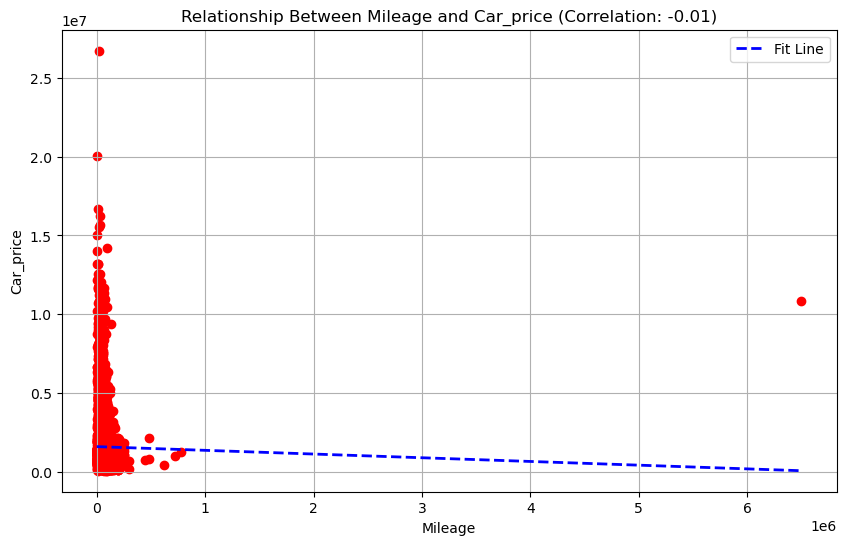

In [24]:
bivarent_analysis(df, x_column='Mileage', y_column='Car_price')

**Observations**

Weak  negative correlation: In this dataset, there is no  relationship between a car’s mileage and its price

Mileage alone cannot be used alone to determine the price of the vehicle other features must be included



**Scatter plot between year and car_price**

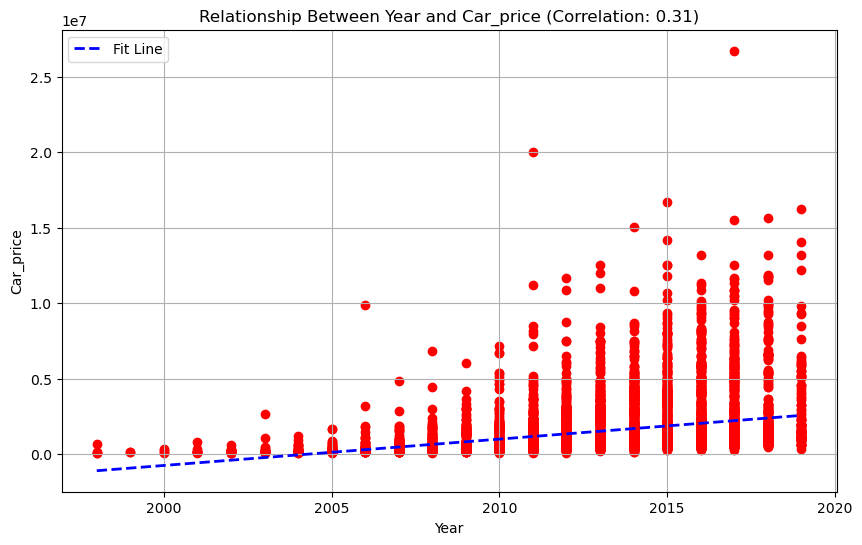

In [25]:
bivarent_analysis(df, x_column='Year', y_column='Car_price')

**Observations**

This indicates a positive but relatively weak correlation between the year of manufacturing and car prices meaning As cars age, their value typically depreciates, resulting in lower prices


#### Multicolinearity analysis 

In [26]:
# function for the correlation matrix
def correlation_matrix(df):
        numerical_df = df.select_dtypes(include=['float', 'int'])
        plt.figure(figsize=(10, 6))
        sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix')
        plt.show()

# Creating function to perform vif
def calculate_vif(df):
    X = df.select_dtypes(include=[np.number])
    X = sm.add_constant(X)
    
    vif_df = pd.DataFrame()
    vif_df['Feature'] = X.columns
    vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Exclude the constant term from the results
    return vif_df[vif_df['Feature'] != 'const']





**Correlation matrix**

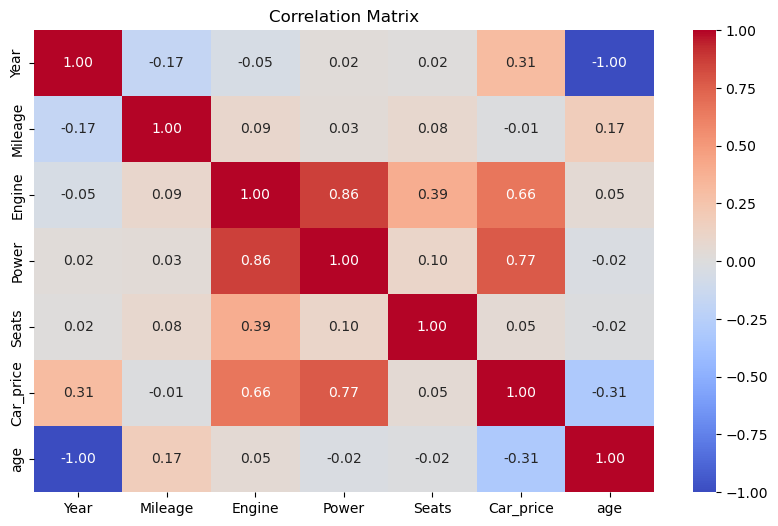

In [27]:
correlation_matrix(df)

**Observations**

The matrix demonstrates that several elements have significant positive relationships, such as the correlation between engine and power (0.86) and the correlation between seats and car pricing (0.77). This implies that as engine power increases, so does overall vehicle power, and as the number of seats in a vehicle increases, so will the car's price.

On the other side, the matrix shows negative correlations, such as the correlation between year and mileage (-0.17), indicating an inverse relationship between these two characteristics. This may imply that as the year of the vehicle grows, the mileage tends to decrease, or vice versa.

The presence of both positive and negative correlations indicates that the dataset may contain multicollinearity, which might have repercussions  when modelling 

**Performing VIF**

The VIF calculates the variance inflation  factor to determine multicolinearity among the features

In [28]:
warnings.filterwarnings("ignore", message="divide by zero encountered in double_scalars")
# Calculate vif
print(calculate_vif(df))


     Feature       VIF
1       Year       inf
2    Mileage  1.044489
3     Engine  6.350604
4      Power  6.610625
5      Seats  1.629408
6  Car_price  3.120482
7        age       inf


The high VIF values for the "Engine" and "Power" features suggest that they may be closely related, and including both of them in a regression model could lead to issues with multicollinearity

## Modelling

Data preprocessing steps followed:

1. **Feature seletion** Choosing features for modelling

2. **Onehot Endcoding** Encoding our categorical variables

3. **Stanndard Scaling** scaling our numerical variables

4. **Train test split** splitting our data into test and train

#### Feature Selection

We will use two methods: 

**. Variance Inflation Factor (VIF) analysis** 

According to the VIF we will drop the power column because it has very high vif value compared to the rest and its very highly correlatable to engine


**. Domain Knowledge**

The features like brand,year,mileage,transmission,use,seats,fuel type are significant because these features are relatable to the real world

Age of the car does vary overtime hence its unstable to be used for modelling

We will use 8 features for modelling; brand,year,mileage,transmission,use,seats,fuel_type,engine 



In [29]:
# Identifying our features

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Dropping irrelevant features
numerical_features.remove('Power')
numerical_features.remove('age')
numerical_features.remove('Car_price')
categorical_features.remove('Model')

print(numerical_features)
print(categorical_features)

['Year', 'Mileage', 'Engine', 'Seats']
['Fuel_Type', 'Transmission', 'Use', 'Brand']


#### Train test split

We will use the 80:20 split ensuring 80% of our data is for training and 20% for testing



In [30]:
# spliting our data into x and y

X= df[numerical_features+categorical_features]
y= df['Car_price']

# Train test spit test
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42, test_size=0.2)

#### Onehot Encoding

Why encoded our categorical variables to represent them as numerical for our machine learning models to understand our data

why onehot encoding it ensures that the categorical variables are represented in a way that satisfies the linearity assumption, as each binary column can have a separate coefficient in the model while preserving the information about the categorical variables

In [31]:

#initialize OneHotEncoder without sparse parameter
ohe = OneHotEncoder(handle_unknown='ignore')

#Fit and transform the training data
X_train_ohe = ohe.fit_transform(X_train[categorical_features])

#Transform the test data
X_test_ohe = ohe.transform(X_test[categorical_features])

#Convert to dense format
X_train_ohe_dense = X_train_ohe.toarray()
X_test_ohe_dense = X_test_ohe.toarray()

#Convert to DataFrame
X_train_cat_df = pd.DataFrame(X_train_ohe_dense, columns=ohe.get_feature_names_out(categorical_features))
X_test_cat_df = pd.DataFrame(X_test_ohe_dense, columns=ohe.get_feature_names_out(categorical_features))

#### Scaling

Why scale the numerical data only:

Numerical variables can have vastly different scales and distributions, resulting in some variables dominating the model's learning process.
Scaling the numerical variables ensures that all variables are on the same scale, preventing specific variables from having a disproportionate impact on the model.

 Scaling categorial variables would distort the inherent information they provide.

Why standard scaler:

The Standard Scaler is less sensitive to outliers in the data compared to Min-Max Scaling

The Standard Scaler performs better with skewed distributions than Min-Max Scaling, which can compress the data range for severely skewed features.



In [32]:
# Intiaizing the standardscaler
scaler= StandardScaler()
# fitting the scaler
X_train_scaled= scaler.fit_transform(X_train[numerical_features])
X_test_scaled= scaler.transform(X_test[numerical_features])
# putting them into dataframe
X_train_num_df = pd.DataFrame(X_train_scaled, columns=numerical_features)
X_test_num_df = pd.DataFrame(X_test_scaled, columns=numerical_features)
# combining the datasets
X_train_processed_df = pd.concat([X_train_cat_df, X_train_num_df], axis=1)
X_test_processed_df = pd.concat([X_test_cat_df, X_test_num_df], axis=1)
#reviewing the dataframe
X_train_processed_df

,Fuel_Type_cng,Fuel_Type_diesel,Fuel_Type_electric,Fuel_Type_lpg,Fuel_Type_petrol,Transmission_automatic,Transmission_manual,Use_foreign,Use_local,Brand_audi,...,Brand_skoda,Brand_suzuki,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Year,Mileage,Engine,Seats
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.736105,0.499221,-0.698958,-0.341862
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.185622,0.192235,-0.204456,-0.341862
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.414591,-1.453221,-0.617919,-0.341862
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.736105,2.467387,1.442783,3.379458
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.107349,1.094774,-0.617919,-0.341862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.492864,-0.810891,-0.204456,-0.341862
4811,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.721833,-1.290639,0.953242,2.139018
4812,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.121621,2.200860,0.921819,2.139018
4813,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.185622,0.506124,-0.204456,-0.341862


#### Linear regression (Base Model)

In [33]:
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_processed_df, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test_processed_df)

# Evaluate the model
lin_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(mse)
print(f'linear regression - MAE: {lin_mae}, RMSE: {lin_rmse}, R^2: {r2}')


linear regression - MAE: 363234530271830.06, RMSE: 8912209198476811.0, R^2: -2.3143161427084747e+19


#### Ridge regression

In [34]:
ridge_model = Ridge()

# Train the model
ridge_model.fit(X_train_processed_df, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test_processed_df)

# Evaluate the model
rid_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rid_rmse = np.sqrt(mse)
print(f'Ridge regression - MAE: {rid_mae}, RMSE: {rid_rmse}, R^2: {r2}')


Ridge regression - MAE: 550384.8422413807, RMSE: 1145068.4316261979, R^2: 0.6179547330673505


#### Lasso regression



In [35]:
lasso_model = Lasso(alpha=0.5, max_iter=10000)

# Train the model
lasso_model.fit(X_train_processed_df, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test_processed_df)

# Evaluate the model
las_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
las_rmse = np.sqrt(mse)
print(f'Lasso regression - MAE: {las_mae}, RMSE: {las_rmse}, R^2: {r2}')


Lasso regression - MAE: 549235.3464514097, RMSE: 1134193.0628821603, R^2: 0.6251772752171285


c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.423e+14, tolerance: 1.688e+12
  model = cd_fast.enet_coordinate_descent(


#### Elastic Net





In [37]:
elastic_model = ElasticNet()

# Train the model
elastic_model.fit(X_train_processed_df, y_train)

# Predict on the test set
y_pred = elastic_model.predict(X_test_processed_df)

# Evaluate the model
ela_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
ela_rmse = np.sqrt(mse)
print(f'ElasticNet regression - MAE: {ela_mae}, RMSE: {ela_rmse}, R^2: {r2}')

ElasticNet regression - MAE: 678576.7997226847, RMSE: 1559892.8719274984, R^2: 0.29100775121617284


#### RandomForest

In [38]:
random_model = RandomForestRegressor(n_estimators=150, random_state=42)

# Train the model
random_model.fit(X_train_processed_df, y_train)

# Predict on the test set
y_pred = random_model.predict(X_test_processed_df)

# Evaluate the model
rad_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rad_rmse = np.sqrt(mse)
print(f'Random regression - MAE: {rad_mae}, RMSE: {rad_rmse}, R^2: {r2}')

Random regression - MAE: 315234.0946552497, RMSE: 712943.8994878451, R^2: 0.8518974096412356


#### KNN Regressor

In [39]:
knn_model = KNeighborsRegressor()

# Train the model
knn_model.fit(X_train_processed_df, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_processed_df)

# Evaluate the model
knn_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
knn_rmse = np.sqrt(mse)
print(f'Knn regression - MAE: {knn_mae}, RMSE: {knn_rmse}, R^2: {r2}')

Knn regression - MAE: 337761.6611295681, RMSE: 750692.5062750847, R^2: 0.8357988852116813


#### Gradient Boosting Models

We will use two :

Catboost regressor

Xgboost regressor

**Catboost model**

In [40]:
cat_model = CatBoostRegressor()

# Train the model
cat_model.fit(X_train_processed_df, y_train)

# Predict on the test set
y_pred = cat_model.predict(X_test_processed_df)

# Evaluate the model
cat_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
cat_rmse = np.sqrt(mse)
print(f'Catboost regression - MAE: {cat_mae}, RMSE: {cat_rmse}, R^2: {r2}')

Learning rate set to 0.052484
0:	learn: 1804317.3684484	total: 138ms	remaining: 2m 17s
1:	learn: 1741755.7699749	total: 141ms	remaining: 1m 10s
2:	learn: 1680963.6815158	total: 143ms	remaining: 47.6s
3:	learn: 1625008.0834848	total: 147ms	remaining: 36.6s
4:	learn: 1571444.3769625	total: 149ms	remaining: 29.7s
5:	learn: 1523231.6682403	total: 153ms	remaining: 25.3s
6:	learn: 1476027.7933056	total: 156ms	remaining: 22.2s
7:	learn: 1431492.9816860	total: 160ms	remaining: 19.8s
8:	learn: 1390782.4036354	total: 162ms	remaining: 17.8s
9:	learn: 1348880.6664348	total: 165ms	remaining: 16.3s
10:	learn: 1309861.8470551	total: 167ms	remaining: 15s
11:	learn: 1275256.8746865	total: 170ms	remaining: 14s
12:	learn: 1243060.0856914	total: 172ms	remaining: 13.1s
13:	learn: 1213818.8578950	total: 175ms	remaining: 12.3s
14:	learn: 1185549.4985618	total: 179ms	remaining: 11.7s
15:	learn: 1158001.3593651	total: 181ms	remaining: 11.2s
16:	learn: 1133818.9086118	total: 184ms	remaining: 10.6s
17:	learn: 11

**Xgboost model**



In [41]:
xg_model = XGBRegressor()

# Train the model
xg_model.fit(X_train_processed_df, y_train)

# Predict on the test set
y_pred = xg_model.predict(X_test_processed_df)

# Evaluate the model
xg_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
xg_rmse = np.sqrt(mse)
print(f'Xgboost regression - MAE: {xg_mae}, RMSE: {xg_rmse}, R^2: {r2}')

Xgboost regression - MAE: 302261.48354626016, RMSE: 697721.36701501, R^2: 0.8581543616301446


Catboost is our best performing model lets tune it further to boost its performance using girdsearch

#### Deep learning Model(Recurrent Neural Network)

In [ ]:
 converting your x,y to a numpy array 
X_train = np.array(X_train_processed_df)
X_test = np.array(X_test_processed_df)
y_train = np.array(y_train)

# Reshaping our data
timesteps = 10
features = X_train.shape[1] // timesteps
X_train = X_train.reshape((X_train.shape[0], timesteps, features))
X_test = X_test.reshape((X_test.shape[0], timesteps, features))

# Defining the model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(timesteps, features)))
model.add(Dense(1))  # For regression; change if needed for classification
model.compile(optimizer='adam', loss='mean_absolute_error')

# fitting the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


ValueError: cannot reshape array of size 197415 into shape (4815,10,4)

## Model Evaluation


Why the evaluation metrics

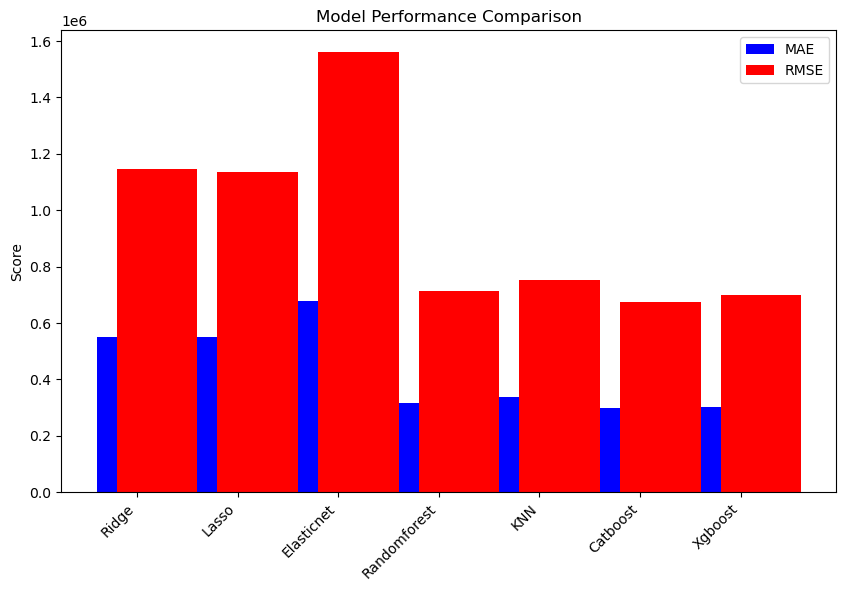

In [42]:
# inputing models data
model_names = [ 'Ridge', 'Lasso', 'Elasticnet', 'Randomforest', 'KNN', 'Catboost', 'Xgboost']
mae_scores = [rid_mae,las_mae,ela_mae,rad_mae,knn_mae,cat_mae,xg_mae]
rmse_scores = [rid_rmse, las_rmse, ela_rmse, rad_rmse, knn_rmse, cat_rmse, xg_rmse]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(model_names, mae_scores, color='b', label='MAE')
ax.bar([x + 0.2 for x in range(len(model_names))], rmse_scores, color='r', label='RMSE')
ax.set_xticks(range(len(model_names)))
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylabel('Score')
ax.legend()
ax.set_title('Model Performance Comparison')
plt.show()

## Deployment

We will deploy the catboost model

In [43]:
# saving model as a pickle file
with open("Catboost.pkl","wb") as file:
    pickle.dump(cat_model,file)

with open("ohe.pkl","wb") as file:
    pickle.dump(ohe,file)  

with open("scaler.pkl","wb") as file:
    pickle.dump(scaler,file)     

## Conclusion & Recommendation

This project successfully built a machine learning model to predict the price of used cars in the Kenyan market. The model considered various features such as age, mileage, and condition to estimate market value.

- The exploratory data analysis (EDA) revealed that newer cars, cars with lower mileage, and cars with larger engines and more power generally command higher prices. Additionally, the distribution of listings by fuel type and transmission preferences provided valuable market insights, indicating a preference for manual transmission and specific fuel types.
- The predictive models, including linear regression, Ridge, Lasso, Random Forest, and XGBoost, were trained and evaluated using cross-validation techniques. The models performed well, with Random Forest and XGBoost showing superior predictive accuracy compared to linear models. 
- Random Forest and XGBoost models showed superior performance in terms of prediction accuracy, with R² scores above 0.85, indicating that these models are highly effective for predicting car prices
- These models are effective in estimating car prices, which is crucial for aiding buyers and sellers in making informed decisions in a market that often lacks transparency.

**Price Distribution**: The price of used cars in Kenya shows a concentration around a specific range, with a high density at approximately 0.1 million Kenyan Shillings.

**Vehicle Age:** Most vehicles in the dataset were manufactured around 2014, indicating a market preference for relatively newer cars.

**Mileage:** Vehicles with higher mileage tend to have lower prices, as expected.

**Transmission Type:** There is a higher prevalence of manual transmission vehicles in the Kenyan market.
Fuel Type: Petrol is the most common fuel type, followed by diesel, reflecting consumer preferences and market availability.

As new data becomes available, continuously updating the model with new data to improve accuracy and adapt to market changes, including more granular features such as location, car brand reputation, and market trends could further enhance predictive performance.

Partnerships with car dealerships and online marketplaces in Kenya to integrate the model into their platforms, will provide users with instant price evaluations during the buying or selling process.

**For Buyers** : Leverage Data Insights to make informed purchasing decisions, ensuring a fair price for the car's condition and specifications. 

**For Sellers**: Set competitive prices based on the car's age, condition, and market demand to attract potential buyers.
- Market Trends: Stay informed about market trends and preferences, such as the growing demand for eco-friendly vehicles, to adjust

**For Car Dealers**: Optimize inventory management by understanding the demand for different car types and models.
- Customer Education: Educate customers about the key factors influencing car prices and provide transparent information to build trust.

